# 데이터 불러오기 

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\user\OneDrive\바탕 화면\22-23 컨퍼런스\df_final.csv", encoding='utf-8-sig')

In [4]:
df.columns

Index(['address_city', 'address_gu', 'sub_address', 'cat', 'sub_cat',
       'stn_cat', 'call_count_cat', 'year', 'month', 'day', 'ta_max', 'ta_min',
       'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'ws_ins_max', 'rn_day',
       'weekday', 'ta_max_3d_ma', 'hm_max_3d_ma', 'ws_diff', 'wind_mean',
       'hm_range', 'rn_day_bin'],
      dtype='object')

In [2]:
# 한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정 (예: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 또는 'NanumGothic'

# 마이너스(-) 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


In [3]:
## cat 데이터 df 생성
## 구급- 교통사고,구급사고 / 부상 / 구조 / 기타+화재로 구분 

# 데이터 프레임 나누기
df_traffic = df[df['sub_cat'].isin(['교통사고', '구급사고'])]
df_help = df[df['cat'] == '구조']
df_etc = df[df['cat'].isin(['기타','화재'])]
df_injury =df[df['sub_cat'] == '부상']

del df_traffic['cat']
del df_help['cat']
del df_etc['cat']
del df_injury['cat']

# CAT DATA EDA 및 데이터 재분할 

Text(0.5, 1.0, '신고 종류별 총 신고 건수')

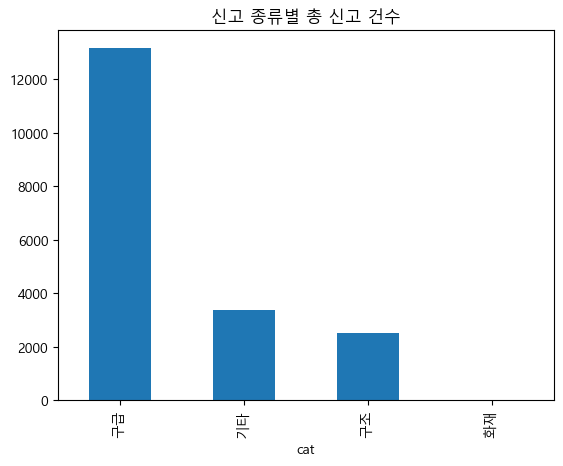

In [24]:
# call 건수 EDA
import matplotlib.pyplot as plt

##  address_gu별 신고 수
df.groupby('cat')['call_count_cat'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("신고 종류별 총 신고 건수")

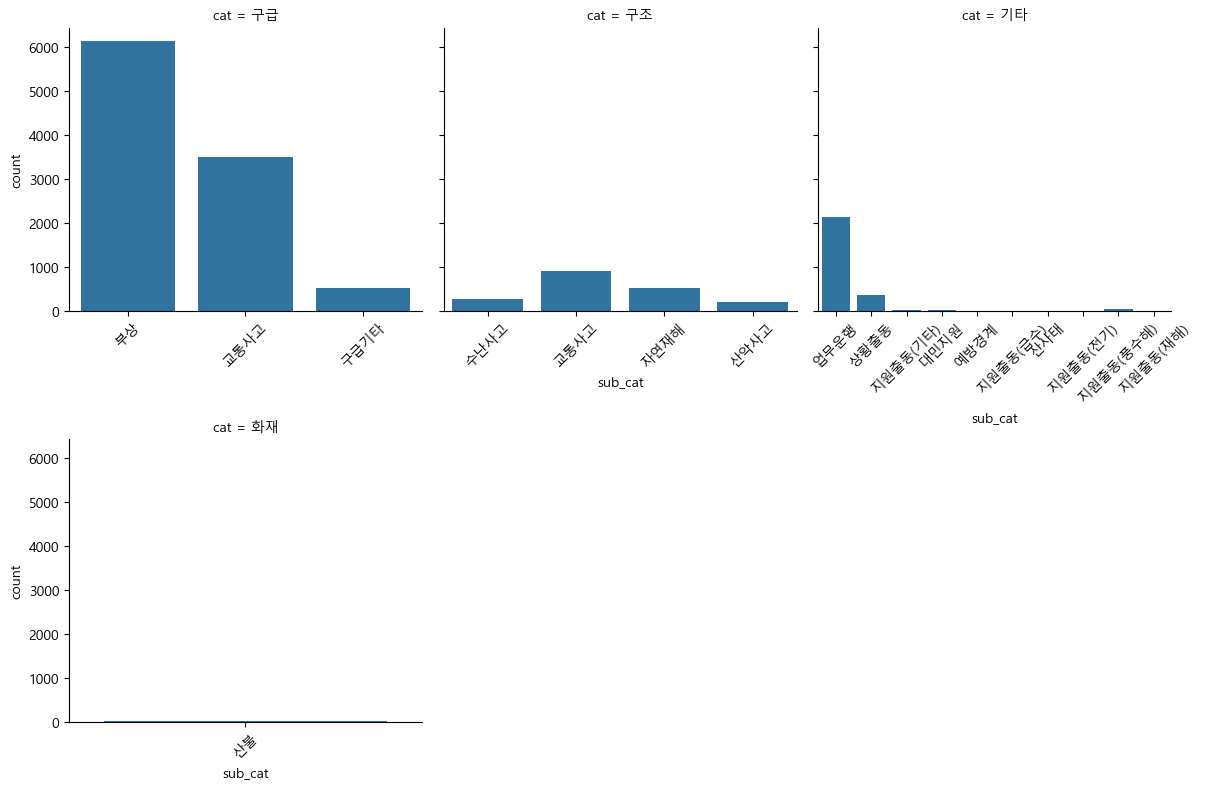

In [16]:
## cat 별 구분 
import seaborn as sns
import matplotlib.pyplot as plt

# cat 별로 sub_cat의 분포 보기
g = sns.catplot(data=df, x="sub_cat", col="cat", kind="count", col_wrap=3, height=4, sharex=False)
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# 목록만 보기 
cat_subcat_map = df.groupby('cat')['sub_cat'].unique()

for cat, subcats in cat_subcat_map.items():
    print(f"[{cat}] → {list(subcats)}")


[구급] → ['부상', '교통사고', '구급기타']
[구조] → ['수난사고', '교통사고', '자연재해', '산악사고']
[기타] → ['업무운행', '상황출동', '지원출동(기타)', '대민지원', '예방경계', '지원출동(급수)', '산사태', '지원출동(전기)', '지원출동(풍수해)', '지원출동(재해)']
[화재] → ['산불']


In [21]:
cat_subcat_counts = df.groupby(['cat', 'sub_cat']).size().reset_index(name='count')
print(cat_subcat_counts)

   cat    sub_cat  count
0   구급       교통사고   3496
1   구급       구급기타    524
2   구급         부상   6134
3   구조       교통사고    914
4   구조       산악사고    208
5   구조       수난사고    264
6   구조       자연재해    524
7   기타       대민지원     23
8   기타        산사태      2
9   기타       상황출동    354
10  기타       업무운행   2123
11  기타       예방경계      4
12  기타   지원출동(급수)      4
13  기타   지원출동(기타)      9
14  기타   지원출동(재해)      1
15  기타   지원출동(전기)      1
16  기타  지원출동(풍수해)     50
17  화재         산불     17


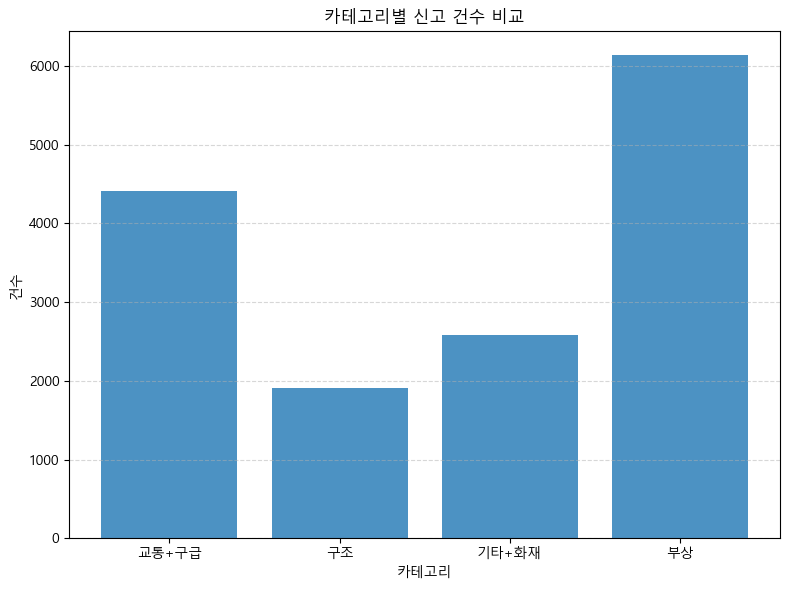

In [5]:
traffic_count = len(df_traffic)
help_count = len(df_help)
etc_count = len(df_etc)
injury_count = len(df_injury)

summary = pd.DataFrame({
    'category': ['교통+구급', '구조', '기타+화재', '부상'],
    'count': [traffic_count, help_count, etc_count, injury_count]
})

plt.figure(figsize=(8, 6))
plt.bar(summary['category'], summary['count'], alpha=0.8)
plt.title('카테고리별 신고 건수 비교')
plt.ylabel('건수')
plt.xlabel('카테고리')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# CAT 별 변수 중요도 

## 1. 구급

In [ ]:
df_traffic.columns
df_traffic.info()
# 'address_city','address_gu', 'sub_address','sub_cat','rn_day_bin'

In [20]:
df_traffic = df[df['sub_cat'].isin(['교통사고', '구급사고'])]
df_help = df[df['cat'] == '구조']
df_etc = df[df['cat'].isin(['기타','화재'])]
df_injury =df[df['sub_cat'] == '부상']
del df_traffic['cat']
del df_help['cat']
del df_etc['cat']
del df_injury['cat']

In [ ]:
# labelencoding 
# random forest, xgboosting에 필요 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_traffic['city_en'] = le.fit_transform(df_traffic['address_city']) 
df_traffic['gu_en'] = le.fit_transform(df_traffic['address_gu']) 
df_traffic['subgu_en'] = le.fit_transform(df_traffic['sub_address']) 
df_traffic['gu_en'] = le.fit_transform(df_traffic['address_gu'])
df_traffic['rn_bin_en'] = le.fit_transform(df_traffic['rn_day_bin'])
df_traffic = df_traffic.drop(columns=['address_city', 'address_gu', 'sub_address', 'sub_cat', 'rn_day_bin'])

MAE:  0.37
MSE:  0.29
RMSE: 0.54
R²:   -0.092


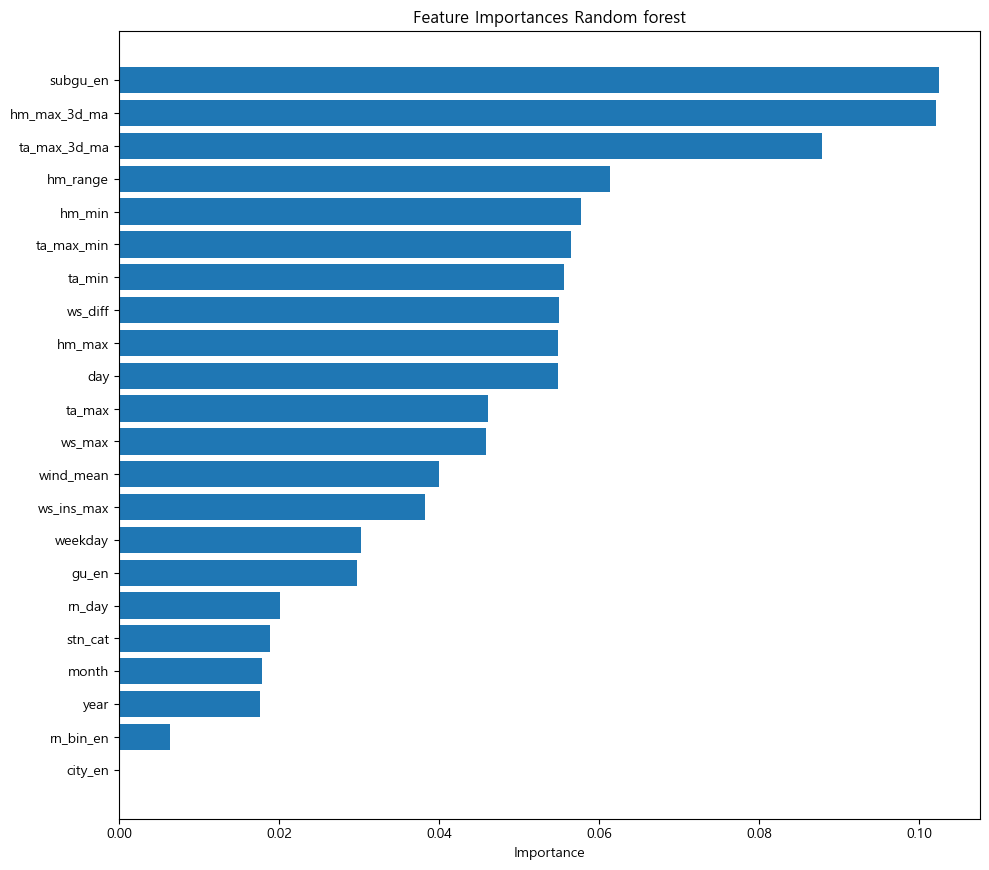

In [22]:
## Random forest 

# 1. X,Y 분리
X = df_traffic.drop(columns=['call_count_cat'])
Y = df_traffic['call_count_cat']

# 2. train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. 모델 학습
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 4. 예측 및 평가

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

import matplotlib.pyplot as plt

# 5.중요도 변수 시각화 
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})

importance_df = importance_df.sort_values(by='importance', ascending=True)
plt.figure(figsize=(10, len(importance_df) * 0.4))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("Importance")
plt.title("Feature Importances Random forest")
plt.tight_layout()
plt.show()


In [ ]:
df_traffic = df[df['sub_cat'].isin(['교통사고', '구급사고'])]

del df_traffic['cat']

# labelencoding 
# random forest, xgboosting에 필요 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_traffic['city_en'] = le.fit_transform(df_traffic['address_city']) 
df_traffic['gu_en'] = le.fit_transform(df_traffic['address_gu']) 
df_traffic['subgu_en'] = le.fit_transform(df_traffic['sub_address']) 
df_traffic['gu_en'] = le.fit_transform(df_traffic['address_gu'])
df_traffic['rn_bin_en'] = le.fit_transform(df_traffic['rn_day_bin'])
df_traffic = df_traffic.drop(columns=['address_city', 'address_gu', 'sub_address', 'sub_cat', 'rn_day_bin'])

MAE:  0.36
MSE:  0.30
RMSE: 0.55
R²:   -0.119


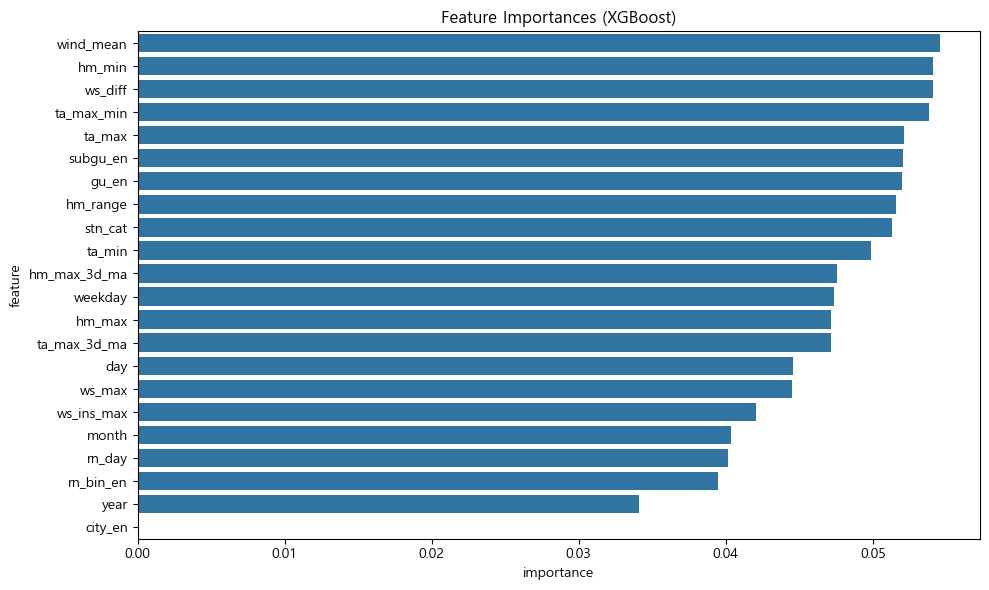

In [25]:
# XGBOOST
## import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1.X,Y 분리
X = df_traffic.drop(columns=['call_count_cat'])
y = df_traffic['call_count_cat']

# 2. 훈련/테스트셋 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. XGBoost 모델 정의 및 학습
model = XGBRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# 4. 예측 및 성능 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

# 5. 중요 변수 시각화
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title("Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


In [83]:
df_traffic.head()

,address_city,address_gu,sub_address,sub_cat,stn_cat,call_count_cat,year,month,day,ta_max,...,ws_max,ws_ins_max,rn_day,weekday,ta_max_3d_ma,hm_max_3d_ma,ws_diff,wind_mean,hm_range,rn_day_bin
2,부산광역시,사하구,감천동,교통사고,159,1,2023,5,1,22.6,...,7.9,11.2,0.0,0,21.666667,69.333333,3.3,9.55,45.0,없음
4,부산광역시,부산진구,부전동,교통사고,938,2,2023,5,1,22.6,...,3.6,8.7,0.0,0,21.666667,75.500000,5.1,6.15,55.2,없음
7,부산광역시,사상구,모라동,교통사고,904,1,2023,5,1,23.0,...,7.7,11.9,0.0,0,22.100000,84.733333,4.2,9.80,65.4,없음
8,부산광역시,북구,만덕동,교통사고,941,1,2023,5,1,23.5,...,5.4,9.6,0.0,0,21.633333,86.600000,4.2,7.50,75.8,없음
14,부산광역시,동래구,사직동,교통사고,940,1,2023,5,1,22.9,...,3.6,8.2,0.0,0,22.300000,73.466667,4.6,5.90,52.3,없음


In [26]:
## LIGHTGBM
# 데이터 초기화 
df_traffic = df[df['sub_cat'].isin(['교통사고', '구급사고'])]
del df_traffic['cat']

In [92]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 1. 문자열 변수 인코딩
X = df_traffic[['address_city', 'address_gu', 'sub_address', 'sub_cat', 'stn_cat',
        'year', 'month', 'day', 'ta_max', 'ta_min',
       'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'ws_ins_max', 'rn_day',
       'weekday', 'ta_max_3d_ma', 'hm_max_3d_ma', 'ws_diff', 'wind_mean',
       'hm_range', 'rn_day_bin']]

y = df_traffic['call_count_cat']

# 문자열 컬럼 인코딩
cat_cols = ['address_city','address_gu', 'sub_address','sub_cat','rn_day_bin']
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# 2. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. LightGBM Dataset 구성
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# 4. 모델 파라미터 설정
param = {
    'objective': 'regression',       
    'metric': 'mae',
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'learning_rate': 0.05,
    'verbose': -1
}

# 5. 학습
bst = lgb.train(param, train_data, num_boost_round=100, valid_sets=[val_data])

# 6. 예측 및 평가
y_pred_val = bst.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
y_pred_bin = (y_pred_val >= 0.5).astype(int)
acc = accuracy_score(y_val, y_pred_bin)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")
print(f"Accuracy: {acc:.4f}")

MAE:  0.35
MSE:  0.27
RMSE: 0.52
R²:   -0.259
Accuracy: 0.8107


C:\Users\user\AppData\Local\Temp\ipykernel_33268\3319242062.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\user\AppData\Local\Temp\ipykernel_33268\3319242062.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\user\AppData\Local\Temp\ipykernel_33268\3319242062.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

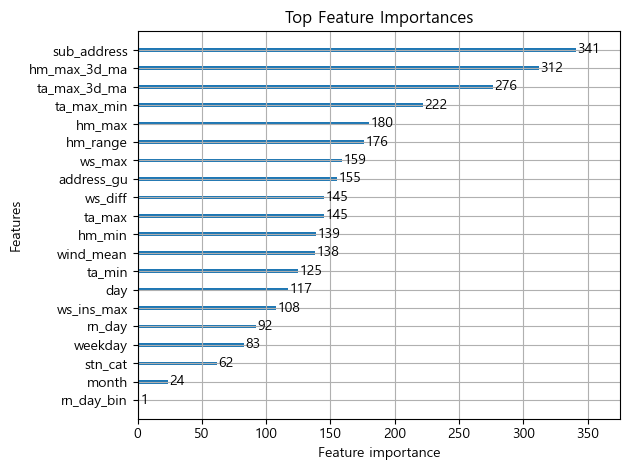

In [96]:
lgb.plot_importance(bst)
plt.title("Top Feature Importances")
plt.tight_layout()
plt.show()

In [28]:
## cat boost 
# 데이터 초기화 
df_traffic = df[df['sub_cat'].isin(['교통사고', '구급사고'])]
del df_traffic['cat']

In [33]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = df_traffic[['address_city', 'address_gu', 'sub_address', 'sub_cat', 'stn_cat',
        'year', 'month', 'day', 'ta_max', 'ta_min',
       'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'ws_ins_max', 'rn_day',
       'weekday', 'ta_max_3d_ma', 'hm_max_3d_ma', 'ws_diff', 'wind_mean',
       'hm_range', 'rn_day_bin']]

y = df_traffic['call_count_cat']

# 1. 학습/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42)

categorical_cols = ['address_city','address_gu', 'sub_address','sub_cat','rn_day_bin'] 

# 2. CatBoost 모델 정의
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='RMSE',
    cat_features=categorical_cols,
    verbose=100,
    early_stopping_rounds=50
)

# 3. 학습
model.fit(
    X_train, y_train.values.ravel(),
    eval_set=(X_val, y_val.values.ravel())
)

# 4. 예측 및 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ Test RMSE: {rmse:.4f}")


0:	learn: 0.5290308	test: 0.5329620	best: 0.5329620 (0)	total: 26.4ms	remaining: 26.4s
100:	learn: 0.5083178	test: 0.5215056	best: 0.5214888 (80)	total: 3.1s	remaining: 27.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5214887713
bestIteration = 80

Shrink model to first 81 iterations.
✅ Test RMSE: 0.4898


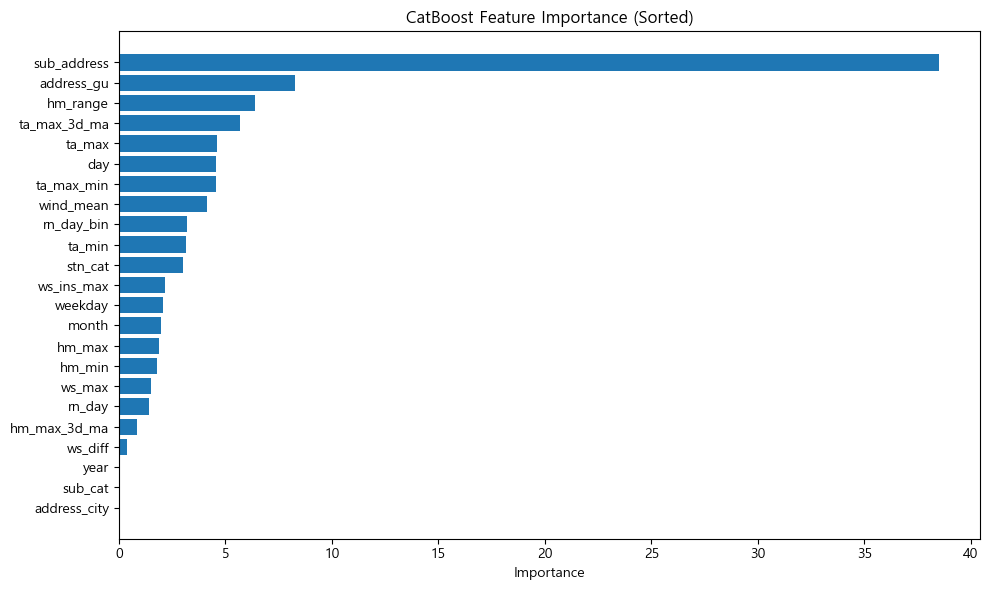

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.get_feature_importance()
}).sort_values(by='importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("Importance")
plt.title("CatBoost Feature Importance")
plt.tight_layout()
plt.show()


# 2. 구조 

In [6]:
df_help = df[df['cat'] == '구조']
del df_help['cat']

In [ ]:
# labelencoding 
# random forest, xgboosting에 필요 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_help['city_en'] = le.fit_transform(df_help['address_city']) 
df_help['gu_en'] = le.fit_transform(df_help['address_gu']) 
df_help['subgu_en'] = le.fit_transform(df_help['sub_address']) 
df_help['gu_en'] = le.fit_transform(df_help['address_gu'])
df_help['rn_bin_en'] = le.fit_transform(df_help['rn_day_bin'])
df_help = df_help.drop(columns=['address_city', 'address_gu', 'sub_address', 'sub_cat', 'rn_day_bin'])


In [18]:
df_help.tail()

,stn_cat,call_count_cat,year,month,day,ta_max,ta_min,ta_max_min,hm_min,hm_max,...,weekday,ta_max_3d_ma,hm_max_3d_ma,ws_diff,wind_mean,hm_range,city_en,gu_en,subgu_en,rn_bin_en
57133,938,1,2023,10,31,23.7,10.4,13.3,20.5,91.9,...,1,23.7,91.9,3.9,5.45,71.4,0,6,66,4
57136,904,1,2023,10,31,24.4,8.6,15.8,22.7,98.8,...,1,24.4,98.8,2.0,5.60,76.1,0,0,34,4
57139,904,1,2023,10,31,24.4,8.6,15.8,22.7,98.8,...,1,24.4,98.8,2.0,5.60,76.1,0,0,49,4
57142,923,1,2023,10,31,24.2,12.5,11.7,27.6,90.0,...,1,25.0,91.2,1.7,3.95,62.4,0,2,110,4
57146,940,1,2023,10,31,24.5,10.0,14.5,20.4,94.0,...,1,24.5,94.0,3.7,4.25,73.6,0,12,92,4


MAE:  0.74
MSE:  5.94
RMSE: 2.44
R²:   -0.372


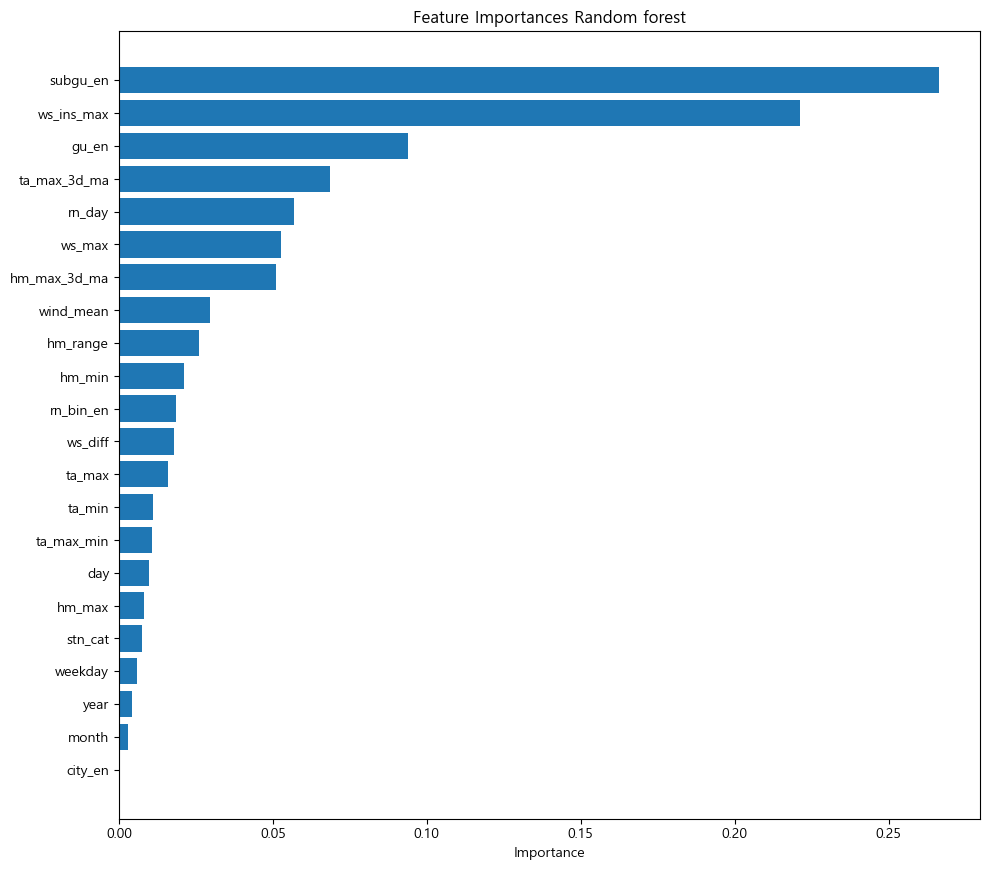

In [36]:
## 구조 데이터 Random forest 

# 1. X,Y 분리
X = df_help.drop(columns=['call_count_cat'])
Y = df_help['call_count_cat']

# 2. train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. 모델 학습
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 4. 예측 및 평가

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

import matplotlib.pyplot as plt

# 5.중요도 변수 시각화 
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})

importance_df = importance_df.sort_values(by='importance', ascending=True)
plt.figure(figsize=(10, len(importance_df) * 0.4))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("Importance")
plt.title("Feature Importances Random forest")
plt.tight_layout()
plt.show()


MAE:  0.79
MSE:  7.27
RMSE: 2.70
R²:   -0.681


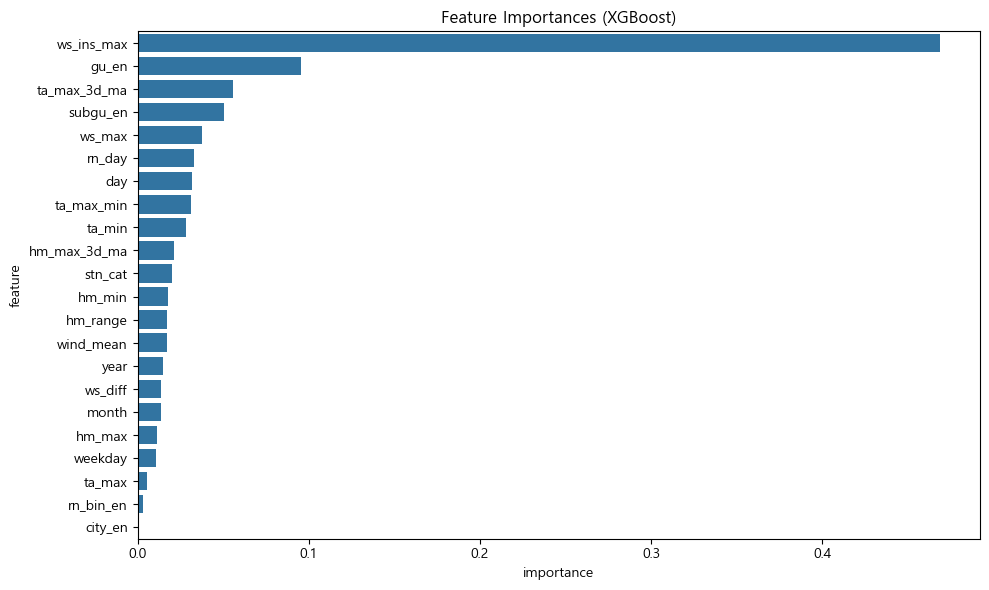

In [37]:
# 구조 데이터 XGBOOST
## import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 1.X,Y 분리
X = df_help.drop(columns=['call_count_cat'])
y = df_help['call_count_cat']

# 2. 훈련/테스트셋 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3. XGBoost 모델 정의 및 학습
model = XGBRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# 4. 예측 및 성능 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

# 5. 중요 변수 시각화
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title("Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


In [38]:
## LIGHTGBM
# 데이터 초기화 
df_help = df[df['cat'] == '구조']
del df_help['cat']

In [39]:
## 구조 데이터 lightGBM
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 1. 문자열 변수 인코딩
X = df_help[['address_city', 'address_gu', 'sub_address', 'sub_cat', 'stn_cat',
        'year', 'month', 'day', 'ta_max', 'ta_min',
       'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'ws_ins_max', 'rn_day',
       'weekday', 'ta_max_3d_ma', 'hm_max_3d_ma', 'ws_diff', 'wind_mean',
       'hm_range', 'rn_day_bin']]

y = df_help['call_count_cat']

# 문자열 컬럼 인코딩
cat_cols = ['address_city','address_gu', 'sub_address','sub_cat','rn_day_bin']
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# 2. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. LightGBM Dataset 구성
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# 4. 모델 파라미터 설정
param = {
    'objective': 'regression',       
    'metric': 'mae',
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'learning_rate': 0.05,
    'verbose': -1
}

# 5. 학습
bst = lgb.train(param, train_data, num_boost_round=100, valid_sets=[val_data])

# 6. 예측 및 평가
y_pred_val = bst.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
y_pred_bin = (y_pred_val >= 0.5).astype(int)
acc = accuracy_score(y_val, y_pred_bin)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")
print(f"Accuracy: {acc:.4f}")

C:\Users\user\AppData\Local\Temp\ipykernel_29372\2456726565.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\user\AppData\Local\Temp\ipykernel_29372\2456726565.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\user\AppData\Local\Temp\ipykernel_29372\2456726565.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

MAE:  0.62
MSE:  3.48
RMSE: 1.86
R²:   -0.681
Accuracy: 0.8335


0:	learn: 0.5290308	test: 0.5329620	best: 0.5329620 (0)	total: 29.6ms	remaining: 29.6s
100:	learn: 0.5083178	test: 0.5215056	best: 0.5214888 (80)	total: 3.21s	remaining: 28.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5214887713
bestIteration = 80

Shrink model to first 81 iterations.
✅ Test RMSE: 0.4898


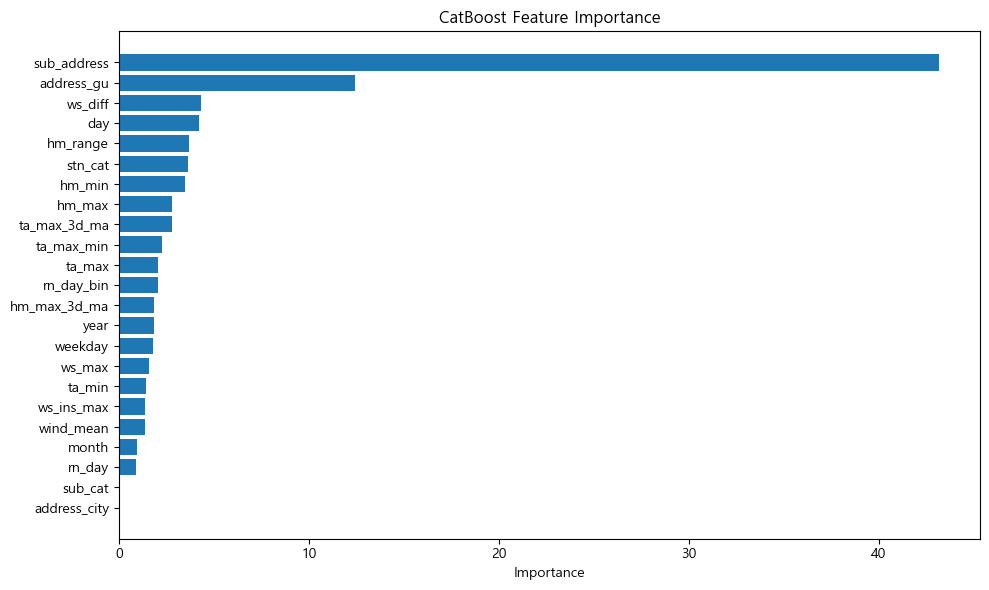

In [7]:
# 구조 데이터 CATBOOST
# 데이터 초기화 
df_help = df[df['sub_cat'].isin(['교통사고', '구급사고'])]
del df_help['cat']

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = df_help[['address_city', 'address_gu', 'sub_address', 'sub_cat', 'stn_cat',
        'year', 'month', 'day', 'ta_max', 'ta_min',
       'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'ws_ins_max', 'rn_day',
       'weekday', 'ta_max_3d_ma', 'hm_max_3d_ma', 'ws_diff', 'wind_mean',
       'hm_range', 'rn_day_bin']]

y = df_help['call_count_cat']


# 1. 학습/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42)

categorical_cols = ['address_city','address_gu', 'sub_address','sub_cat','rn_day_bin'] 

# 2. CatBoost 모델 정의
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='RMSE',
    cat_features=categorical_cols,
    verbose=100,
    early_stopping_rounds=50
)

# 3. 학습
model.fit(
    X_train, y_train.values.ravel(),
    eval_set=(X_val, y_val.values.ravel())
)

# 4. 예측 및 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ Test RMSE: {rmse:.4f}")

# 5. 시각화
import matplotlib.pyplot as plt
import pandas as pd

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.get_feature_importance()
}).sort_values(by='importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("Importance")
plt.title("CatBoost Feature Importance")
plt.tight_layout()
plt.show()


# 3. 부상

In [9]:
df_injury = df[df['sub_cat'].isin(['교통사고', '구급사고'])]
del df_injury['cat']
# 교집합 확인
common_rows = pd.merge(df_injury, df_help, how='inner')
print(f"중복된 행 개수: {len(common_rows)}")

중복된 행 개수: 17144


0:	learn: 0.5290308	test: 0.5329620	best: 0.5329620 (0)	total: 174ms	remaining: 2m 53s
100:	learn: 0.5083178	test: 0.5215056	best: 0.5214888 (80)	total: 3.27s	remaining: 29.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5214887713
bestIteration = 80

Shrink model to first 81 iterations.
✅ Test RMSE: 0.4898


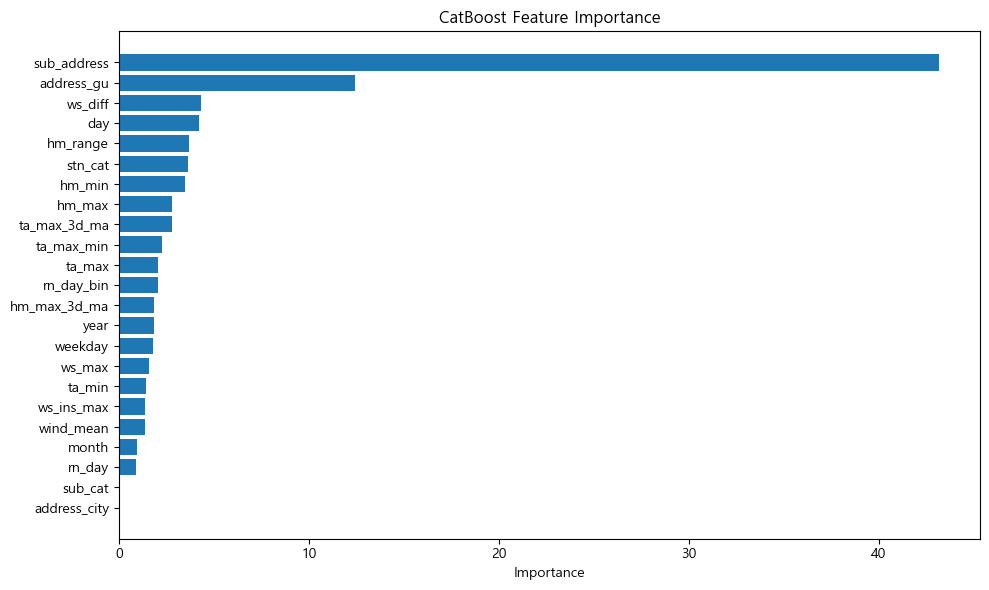

In [5]:
# 부상 CATBOOST
# 데이터 초기화 
df_injury = df[df['sub_cat'].isin(['교통사고', '구급사고'])]
del df_injury['cat']

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df_injury[['address_city', 'address_gu', 'sub_address', 'sub_cat', 'stn_cat',
        'year', 'month', 'day', 'ta_max', 'ta_min',
       'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'ws_ins_max', 'rn_day',
       'weekday', 'ta_max_3d_ma', 'hm_max_3d_ma', 'ws_diff', 'wind_mean',
       'hm_range', 'rn_day_bin']]

y = df_injury['call_count_cat']

# 1. 학습/검증 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42)

categorical_cols = ['address_city','address_gu', 'sub_address','sub_cat','rn_day_bin'] 

# 2. CatBoost 모델 정의
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='RMSE',
    cat_features=categorical_cols,
    verbose=100,
    early_stopping_rounds=50
)

# 3. 학습
model.fit(
    X_train, y_train.values.ravel(),
    eval_set=(X_val, y_val.values.ravel())
)

# 4. 예측 및 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ Test RMSE: {rmse:.4f}")

# 5. 시각화
import matplotlib.pyplot as plt
import pandas as pd

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.get_feature_importance()
}).sort_values(by='importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("Importance")
plt.title("CatBoost Feature Importance")
plt.tight_layout()
plt.show()


In [126]:
## 부상 lightgbm 
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 1. 문자열 변수 인코딩
X = df_injury[['address_city', 'address_gu', 'sub_address', 'sub_cat', 'stn_cat',
        'year', 'month', 'day', 'ta_max', 'ta_min',
       'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'ws_ins_max', 'rn_day',
       'weekday', 'ta_max_3d_ma', 'hm_max_3d_ma', 'ws_diff', 'wind_mean',
       'hm_range', 'rn_day_bin']]

y = df_injury['call_count_cat']

# 문자열 컬럼 인코딩
cat_cols = ['address_city','address_gu', 'sub_address','sub_cat','rn_day_bin']
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# 2. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. LightGBM Dataset 구성
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# 4. 모델 파라미터 설정
param = {
    'objective': 'regression',       
    'metric': 'mae',
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'learning_rate': 0.05,
    'verbose': -1
}

# 5. 학습
bst = lgb.train(param, train_data, num_boost_round=100, valid_sets=[val_data])

# 6. 예측 및 평가
y_pred_val = bst.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
y_pred_bin = (y_pred_val >= 0.5).astype(int)
acc = accuracy_score(y_val, y_pred_bin)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")
print(f"Accuracy: {acc:.4f}")

MAE:  0.35
MSE:  0.27
RMSE: 0.52
R²:   0.042
Accuracy: 0.8107


C:\Users\user\AppData\Local\Temp\ipykernel_33268\704242247.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\user\AppData\Local\Temp\ipykernel_33268\704242247.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\user\AppData\Local\Temp\ipykernel_33268\704242247.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

# 4. 기타

In [ ]:
# 데이터 프레임 나누기
df_traffic = df[df['sub_cat'].isin(['교통사고', '구급사고'])]
df_help = df[df['cat'] == '구조']
df_etc = df[df['cat'].isin(['기타','화재'])]
df_injury =df[df['sub_cat'] == '부상']

del df_traffic['cat']
del df_help['cat']
del df_etc['cat']
del df_injury['cat']

0:	learn: 0.5290308	test: 0.5329620	best: 0.5329620 (0)	total: 174ms	remaining: 2m 53s
100:	learn: 0.5083178	test: 0.5215056	best: 0.5214888 (80)	total: 3.19s	remaining: 28.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5214887713
bestIteration = 80

Shrink model to first 81 iterations.
✅ Test RMSE: 0.4898


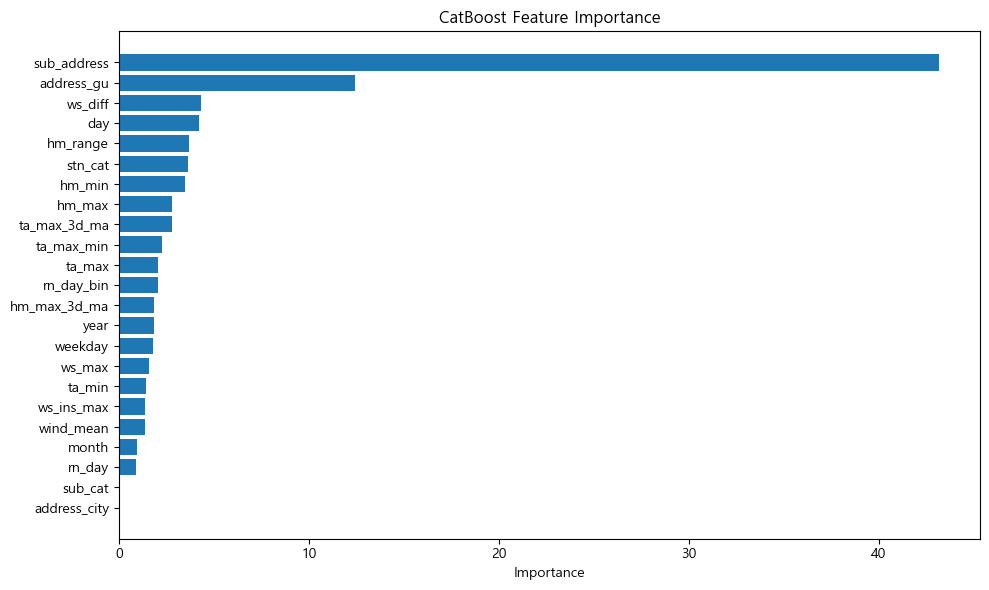

In [ ]:
# 기타 데이터 CATBOOST

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_etc[['address_city', 'address_gu', 'sub_address', 'sub_cat', 'stn_cat',
        'year', 'month', 'day', 'ta_max', 'ta_min',
       'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'ws_ins_max', 'rn_day',
       'weekday', 'ta_max_3d_ma', 'hm_max_3d_ma', 'ws_diff', 'wind_mean',
       'hm_range', 'rn_day_bin']]

y = df_etc['call_count_cat']

# 1. 학습/검증 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42)

categorical_cols = ['address_city','address_gu', 'sub_address','sub_cat','rn_day_bin'] 

# 2. CatBoost 모델 정의
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='RMSE',
    cat_features=categorical_cols,
    verbose=100,
    early_stopping_rounds=50
)

# 3. 학습
model.fit(
    X_train, y_train.values.ravel(),
    eval_set=(X_val, y_val.values.ravel())
)

# 4. 예측 및 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ Test RMSE: {rmse:.4f}")

# 5. 시각화
import matplotlib.pyplot as plt
import pandas as pd

importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.get_feature_importance()
}).sort_values(by='importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("Importance")
plt.title("CatBoost Feature Importance")
plt.tight_layout()
plt.show()


In [5]:
# 예측이 정답에서 ±1 이하로 차이 나는 비율
threshold = 1.0
accuracy_like = np.mean(np.abs(y_test - y_pred) <= threshold)
print(f"✅ ±{threshold} 이내 예측 정확도: {accuracy_like * 100:.2f}%")

✅ ±1.0 이내 예측 정확도: 97.01%


# 함수 정의

In [ ]:
## cat 데이터 df 생성
## 구급- 교통사고,구급사고 / 부상 / 구조 / 기타+화재로 구분 

# 데이터 프레임 나누기
df_traffic = df[(df['cat'] == '구급') & (df['sub_cat'].isin(['교통사고', '구급기타']))]
df_help = df[df['cat'] == '구조']
df_etc = df[df['cat'].isin(['기타','화재'])]
df_injury =df[df['sub_cat'] == '부상']

del df_traffic['cat']
del df_help['cat']
del df_etc['cat']
del df_injury['cat']

In [6]:
df_traffic = df[df['sub_cat'].isin(['교통사고', '구급사고'])]
df_traffic

,address_city,address_gu,sub_address,cat,sub_cat,stn_cat,call_count_cat,year,month,day,...,ws_max,ws_ins_max,rn_day,weekday,ta_max_3d_ma,hm_max_3d_ma,ws_diff,wind_mean,hm_range,rn_day_bin
0,부산광역시,강서구,대저2동,구급,교통사고,904,1,2020,5,1,...,5.8,10.6,0.0,4,23.7,90.30,4.8,8.20,27.1,없음
1,부산광역시,강서구,천성동,구조,교통사고,921,1,2020,5,1,...,4.8,8.6,0.0,4,24.0,93.35,3.8,6.70,32.2,없음
5,부산광역시,동래구,명장동,구급,교통사고,940,1,2020,5,1,...,4.8,8.3,0.0,4,25.6,76.40,3.5,6.55,29.8,없음
8,부산광역시,사하구,다대동,구급,교통사고,950,1,2020,5,1,...,4.4,7.9,0.0,4,23.6,93.80,3.5,6.15,31.9,없음
10,부산광역시,금정구,장전동,구급,교통사고,940,1,2020,5,1,...,4.8,8.3,0.0,4,25.6,76.40,3.5,6.55,29.8,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57133,부산광역시,부산진구,부암동,구급,교통사고,938,1,2023,10,31,...,3.5,7.4,0.0,1,23.7,91.90,3.9,5.45,71.4,없음
57136,부산광역시,강서구,대저2동,구급,교통사고,904,1,2023,10,31,...,4.6,6.6,0.0,1,24.4,98.80,2.0,5.60,76.1,없음
57139,부산광역시,강서구,명지동,구급,교통사고,904,1,2023,10,31,...,4.6,6.6,0.0,1,24.4,98.80,2.0,5.60,76.1,없음
57142,부산광역시,기장군,정관읍,구급,교통사고,923,1,2023,10,31,...,3.1,4.8,0.0,1,25.0,91.20,1.7,3.95,62.4,없음


In [ ]:
df_traffic = df[df['sub_cat'].isin(['교통사고', '구급사고'])]

df_help = df[df['cat'] == '구조']
df_etc = df[df['cat'].isin(['기타','화재'])]
df_injury =df[df['sub_cat'] == '부상']

del df_traffic['cat']
del df_help['cat']
del df_etc['cat']
del df_injury['cat']

In [ ]:
## cat 데이터 df 생성
## 구급- 교통사고,구급사고 / 부상 / 구조 / 기타+화재로 구분 

# 데이터 프레임 나누기
df_traffic = df[df['sub_cat'].isin(['교통사고', '구급사고'])]
df_help = df[df['cat'] == '구조']
df_etc = df[df['cat'].isin(['기타','화재'])]
df_injury =df[df['sub_cat'] == '부상']

del df_traffic['cat']
del df_help['cat']
del df_etc['cat']
del df_injury['cat']

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


feature_cols = ['address_city', 'address_gu', 'sub_address', 'sub_cat', 'stn_cat',
        'year', 'month', 'day', 'ta_max', 'ta_min',
       'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'ws_ins_max', 'rn_day',
       'weekday', 'ta_max_3d_ma', 'hm_max_3d_ma', 'ws_diff', 'wind_mean',
       'hm_range', 'rn_day_bin']
categorical_cols = ['address_city','address_gu', 'sub_address','sub_cat','rn_day_bin'] 

def run_catboost(df_subset, name=""):
    X = df_subset[feature_cols]
    y = df_subset['call_count_cat']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

    model = CatBoostRegressor(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        eval_metric='RMSE',
        cat_features=categorical_cols,
        verbose=100,
        early_stopping_rounds=50
    )

    model.fit(
        X_train, y_train.values.ravel(),
        eval_set=(X_val, y_val.values.ravel())
    ) 

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"✅ {name} RMSE: {rmse:.4f}")

    # 🔍 Feature Importance 시각화
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': model.get_feature_importance()
    }).sort_values(by='importance', ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['feature'], importance_df['importance'])
    plt.xlabel("Importance")
    plt.title(f"CatBoost Feature Importance – {name}")
    plt.tight_layout()
    plt.show()

    return model


0:	learn: 0.5290308	test: 0.5329620	best: 0.5329620 (0)	total: 145ms	remaining: 2m 24s
100:	learn: 0.5083178	test: 0.5215056	best: 0.5214888 (80)	total: 13.4s	remaining: 1m 59s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5214887713
bestIteration = 80

Shrink model to first 81 iterations.
✅ 교통 RMSE: 0.4898


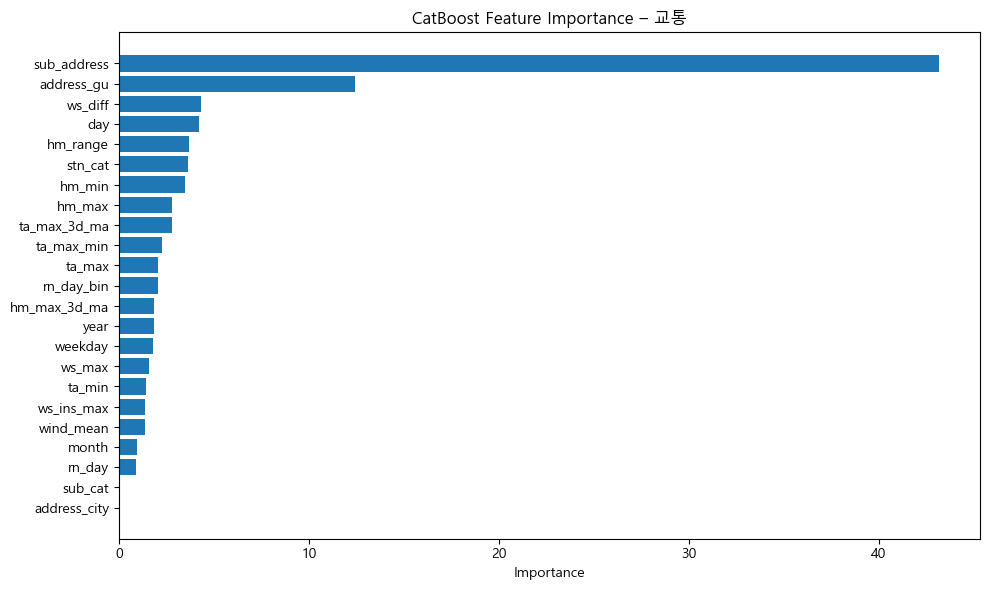

0:	learn: 2.5489018	test: 2.2344457	best: 2.2344457 (0)	total: 152ms	remaining: 2m 32s
100:	learn: 1.3328640	test: 1.7481453	best: 1.7481453 (100)	total: 15.7s	remaining: 2m 19s
200:	learn: 1.1497093	test: 1.7119052	best: 1.7097393 (184)	total: 29.6s	remaining: 1m 57s
300:	learn: 1.0361588	test: 1.7044299	best: 1.7044299 (300)	total: 42.4s	remaining: 1m 38s
400:	learn: 0.9408858	test: 1.6919855	best: 1.6917805 (398)	total: 55.4s	remaining: 1m 22s
500:	learn: 0.8724033	test: 1.6846418	best: 1.6844691 (482)	total: 1m 6s	remaining: 1m 5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1.680495379
bestIteration = 529

Shrink model to first 530 iterations.
✅ 구조 RMSE: 1.7282


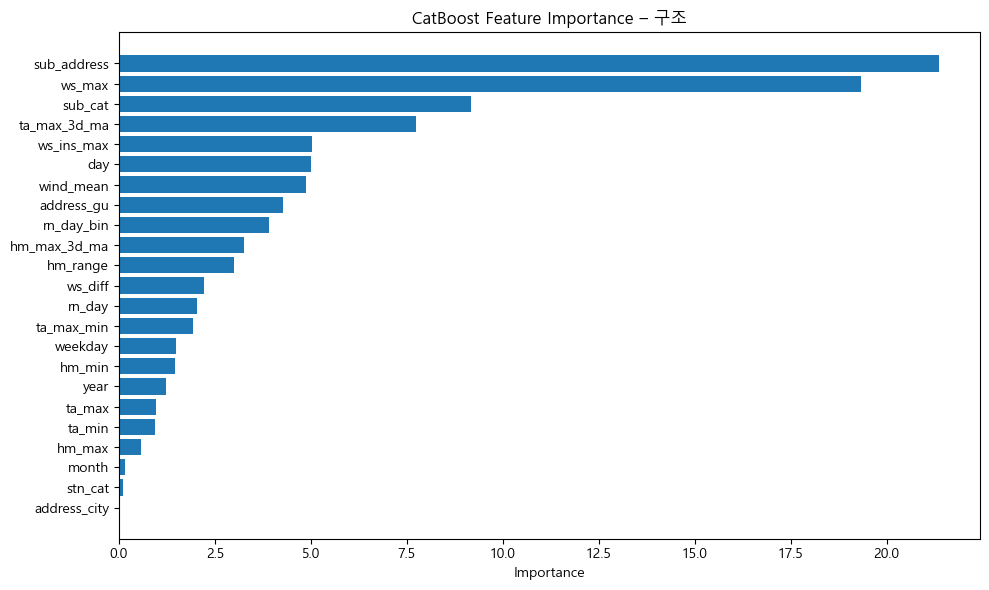

0:	learn: 0.8053356	test: 0.7920795	best: 0.7920795 (0)	total: 146ms	remaining: 2m 26s
100:	learn: 0.6185986	test: 0.7323105	best: 0.7316864 (91)	total: 12.2s	remaining: 1m 48s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7316863731
bestIteration = 91

Shrink model to first 92 iterations.
✅ 기타 RMSE: 0.6306


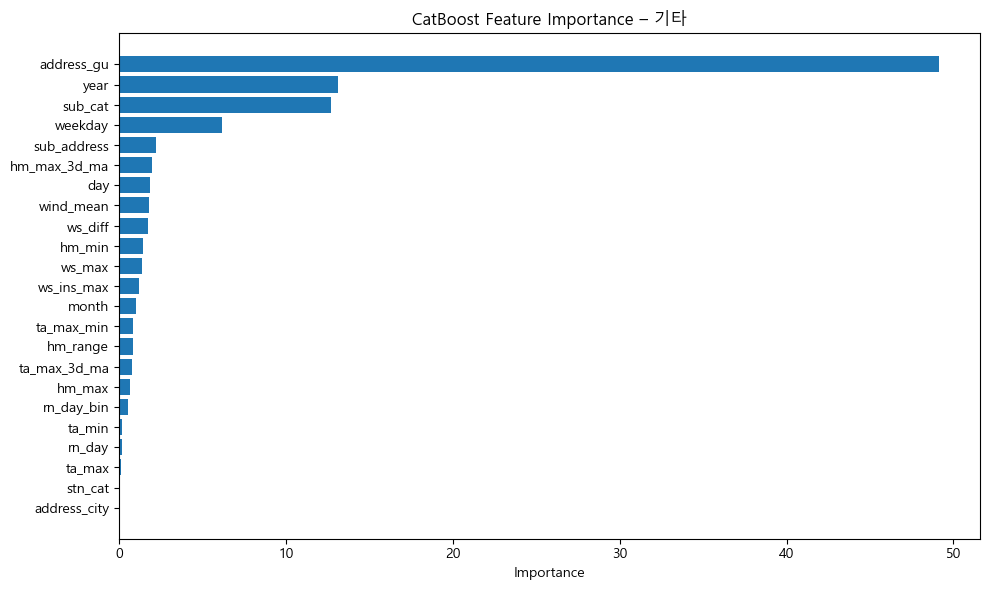

0:	learn: 0.6704712	test: 0.6869653	best: 0.6869653 (0)	total: 178ms	remaining: 2m 57s
100:	learn: 0.6083133	test: 0.6409599	best: 0.6409599 (100)	total: 13.5s	remaining: 1m 59s
200:	learn: 0.5970088	test: 0.6409576	best: 0.6406766 (163)	total: 27.5s	remaining: 1m 49s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6406766064
bestIteration = 163

Shrink model to first 164 iterations.
✅ 부상 RMSE: 0.6204


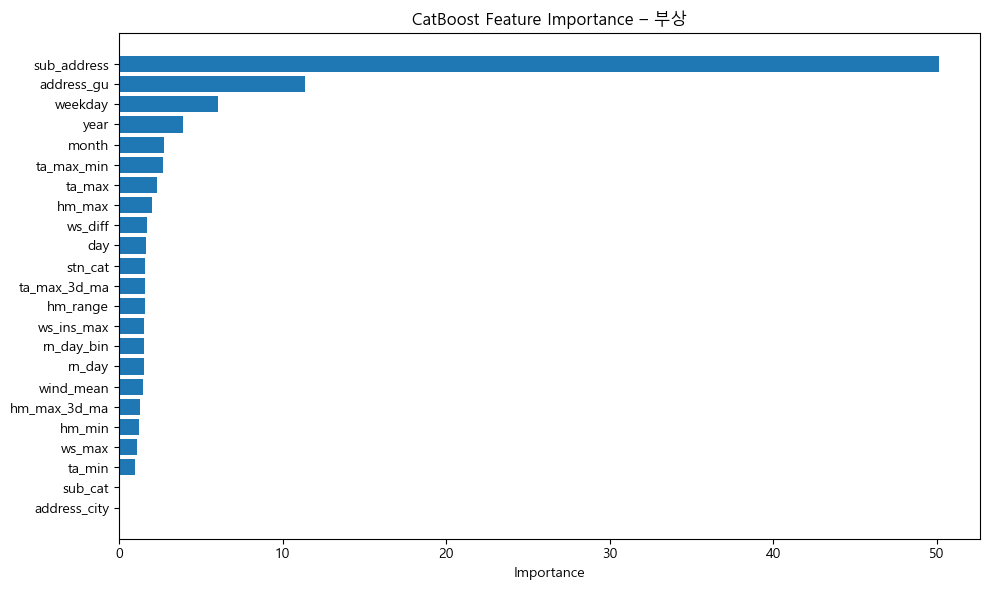

In [13]:
model_traffic = run_catboost(df_traffic, name="교통")
model_help = run_catboost(df_help, name="구조")
model_etc = run_catboost(df_etc, name="기타")
model_injury = run_catboost(df_injury, name="부상")